In [7]:
import torch
import torchvision.models as models

from image_preprocessing import image_loader, masks_loader, plt_images
from neural_style import run_style_transfer

%matplotlib inline

In [8]:
idx = 1
path = 'examples/'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
imsize = (512, 512) if torch.cuda.is_available() else (128, 128)

In [9]:
print(device)

cpu


#### Get images

In [10]:
style_img = image_loader(path + 'style/tar{}.png'.format(idx), imsize).to(device, torch.float)
content_img = image_loader(path + 'input/in{}.png'.format(idx), imsize).to(device, torch.float)
input_img = content_img.clone()

style_masks, content_masks = masks_loader(
    path + 'segmentation/tar{}.png'.format(idx),
    path + 'segmentation/in{}.png'.format(idx),
    imsize)

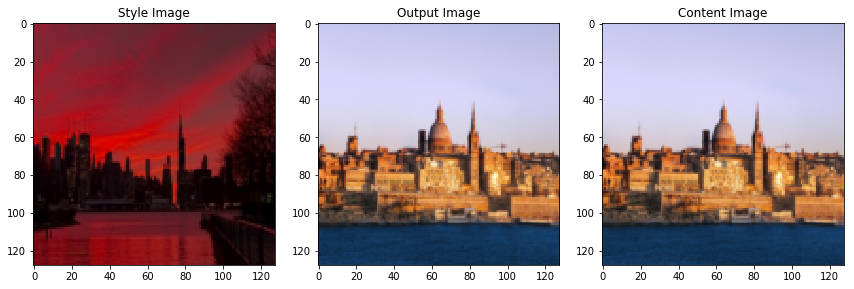

In [11]:
plt_images(style_img, input_img, content_img)

#### Load model

VGG is trained with the following normalization. We use it to normalize our images as well.

In [12]:
vgg = models.vgg19(pretrained=True).features.to(device).eval()

vgg_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
vgg_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

style_layers = ["conv1_1", "conv2_1", "conv3_1", "conv4_1", "conv5_1"]
content_layers = ["conv4_2"]

- - - 

### Pipeline

First, we perform the style transfer without the photorealistic regularization then we add the regularization term.

#### reg=False, num_steps=500

In [13]:
%%time

output = run_style_transfer(
    vgg,
    vgg_normalization_mean,
    vgg_normalization_std,
    style_layers,
    content_layers,
    style_img,
    content_img,
    input_img,
    style_masks,
    content_masks,
    device,
    reg=False,
    style_weight=1e6,
    content_weight=1e4,
    reg_weight=0,
    num_steps=500,
)

/work/test/PyTorch-deep-photo-styletransfer/neural_style.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
/work/test/PyTorch-deep-photo-styletransfer/neural_style.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


step   50: S: 254.539 C: 17.664 R:0.000
step  100: S: 203.544 C: 11.870 R:0.000
step  150: S: 155.625 C: 14.233 R:0.000
step  200: S: 129.494 C: 10.914 R:0.000
step  250: S: 118.502 C: 9.296 R:0.000
step  300: S: 111.736 C: 8.842 R:0.000
step  350: S: 106.874 C: 8.894 R:0.000
step  400: S: 101.858 C: 8.633 R:0.000
step  450: S: 97.740 C: 8.756 R:0.000
step  500: S: 93.772 C: 9.463 R:0.000
CPU times: user 8min 56s, sys: 6.27 s, total: 9min 2s
Wall time: 2min 49s


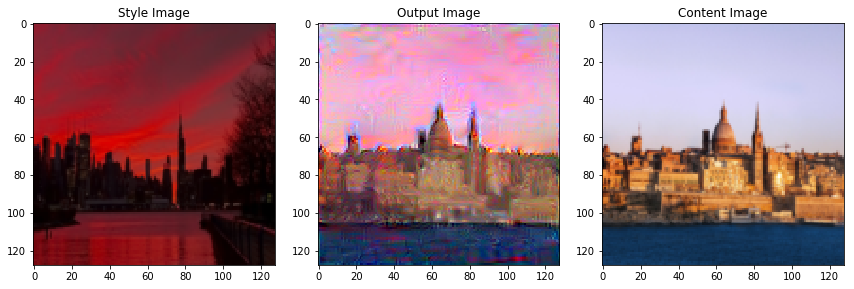

In [14]:
plt_images(style_img, input_img, content_img)

#### reg=True, num_steps=500

In [9]:
%%time

output = run_style_transfer(
    vgg,
    vgg_normalization_mean,
    vgg_normalization_std,
    style_layers,
    content_layers,
    style_img,
    content_img,
    input_img,
    style_masks,
    content_masks,
    device,
    reg=True,
    style_weight=1e6,
    content_weight=1e4,
    reg_weight=1e-4,
    num_steps=500,
)

step   50: S: 88.020 C: 8.150 R:501.685
step  100: S: 84.858 C: 7.918 R:465.460
step  150: S: 82.622 C: 8.002 R:457.547
step  200: S: 80.983 C: 8.380 R:489.305
step  250: S: 79.206 C: 8.605 R:556.588
step  300: S: 77.155 C: 9.207 R:680.805
step  350: S: 76.459 C: 9.772 R:869.705
step  400: S: 82.103 C: 14.774 R:1244.457
step  450: S: 69.898 C: 9.240 R:1144.961
step  500: S: 68.251 C: 10.164 R:1314.336
CPU times: user 9min 6s, sys: 6.44 s, total: 9min 12s
Wall time: 2min 57s


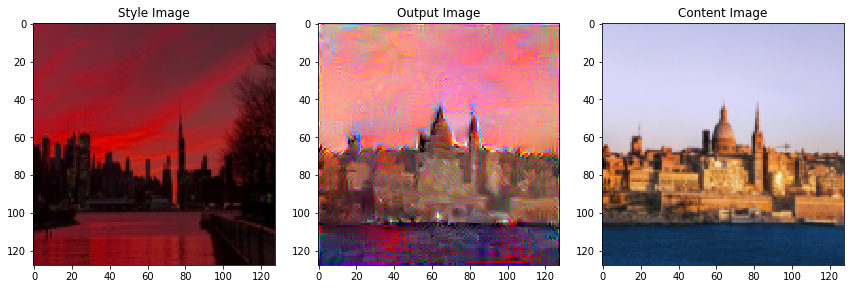

In [10]:
plt_images(style_img, input_img, content_img)